# Untrained

This notebook is an attempt to diagnose the causes that lead the distributed agents to decrease the rewards around the last training steps.

To reproduce set the configuration in the file `config.py` to:

```
  ALPHA = 0.5  # ALPHA:
  BETA = 0.3  # BETA:
  TAU = 5.0   # Final TAU
  EXPLORE_EPISODES = 9975
  EPISODES = 10000
  EXPLORE = True  # WHETER OR NOT WE USE EXPLORATION

  SEED = 0
  BASE_PATH = '00_duo/01_tau05_10000/01_distributed_learners/'
```
Where `tau` is a temperature parameter associated with exploratory behaviour. The larger it is the more indiferent the agent will be towards selecting the greedy action. It appears dividing the score, approximate Q-value of a boltzman policy.

And run `python pipeline.py`

![pipeline-central-train-30](00_duo/01_tau05_10000/01_distributed_learners/01/train_returns_n2-seed01.png)
![rollout-central-train-30](00_duo/01_tau05_10000/01_distributed_learners/01/train_rollouts_n2-seed01.png)


GIF from the best training with seed 01.


![pipeline-joint-simulation](00_duo/01_tau05_10000/01_distributed_learners/01/simulation-seed01.gif)

## 1. Computing the number of collisions.

<AxesSubplot:title={'center':'Collisions per Episode'}>

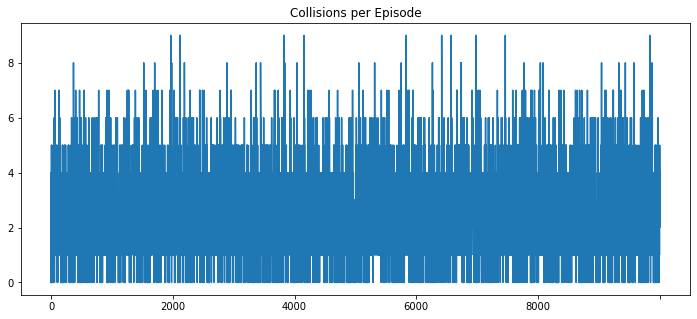

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


FIG_SIZE_LARGE = (12.0, 5.0)
FIG_SIZE_SMALL = (6.0, 4.0)

BASE_PATH = '00_duo/01_tau05_10000/01_distributed_learners/01'
df = pd.read_csv(BASE_PATH + '/train_collisions-seed01.csv', sep=',', index_col=0)
df.sum(axis=0).to_frame().loc[:, 0].plot(title='Collisions per Episode', figsize=FIG_SIZE_LARGE)

## 2. Separating the critics.

The distributed has the same policy but computed distributedly between the two agents.

- **Before**: One array for the critic.
- **After**: Two arrays for the critic.
- **Results**: The same.

In this context, how does the agent makes simetric moves? i.e (up, down) and (down, up)? The space of policies might become constraint to the policies that aggree with each other.

## 3. Action coupling.

Let's count the number of times that the agent agrees in the actions.

In [2]:
BASE_PATH = '00_duo/01_tau05_10000/01_distributed_learners/01'
df = pd.read_csv(BASE_PATH + '/traces-seed01.csv', sep=',', index_col=0)

In [3]:
df['episode'] = df.index // 100
df['agreements'] = (df['a0'].values == df['a1'].values).astype(int)

In [4]:
df[['episode', 'agreements', 'a0', 'a1']].head()

,episode,agreements,a0,a1
0,0,1,DOWN,DOWN
1,0,0,RIGHT,LEFT
2,0,0,LEFT,RIGHT
3,0,0,LEFT,DOWN
4,0,1,LEFT,LEFT


<AxesSubplot:title={'center':'Agreements per Episode'}, xlabel='episode'>

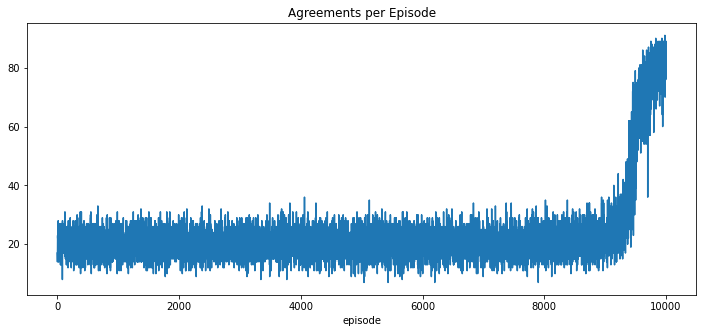

In [5]:
df.groupby(by=['episode'])['agreements'].sum().plot(title='Agreements per Episode' , figsize=FIG_SIZE_LARGE)